# HCI 574 General HW Instructions


### Work through the problems
- Answer the questions shown in the HW. Fix anything with ???. Answers to text questions should be given in a printed string, e.g.:  `print("This is the answer")` or as a comment e.g. `# This is the answer`
- Ensure that VSCode is set to autosve your notebook! In _Settings_ search for autosave and set it to 1000 ms.
- It's fine to create new python cells if you want to try something without changing the offcial cell but please ensure that at the end there's only one cell with your official answer to the question and (__very impotant!__) that that cell as been run/executed so we can see its output. If you want to "save" your inofficial cell(s), make sure they are fully commented out!



### Handing in the HW
- Check that all other files the HW might have (screenshots, data files, etc.) are indeed in the correct HW folder.
- Zip your HW folder folder (e.g. into HW1_ALemming.zip). On Windows you can Right-click -> Send To - Compress Folder. Please don't use rar or any other exotic compressors!
- Zip your HW folder and hand it into Gradescope


### Points

The number of points a problem is worth when solved properly is always shown inside brackets at the heading of the problem, e.g.
##### Q1 [ 3.5 pts]  This problem is worth 3.5 points

Sometimes you may get additional extra credits if we feel your solution is particularly clever, etc. 
Some problem are entirely __optional__, these will have a + in from of the points, e.g.
##### Q2 [ +1 pt ] This *optional* problem is worth 1 point

You can solve these optional points to learn more or make up of points you missed in earlier HW. Note however, that there's a cap on the total HW points, if you have more than 100% of HW points the end of the semester, it will be reduced to 100%

### Questions?
If you have questions or need help, ask me after class, use Piazza or ask the TA during office hours  

# HCI 574 - HW 9 - Image processing with PIL/Pillow 
- the folders pics1 and pics2 contain a set of images
- in this HW, you will place thumbnails of these images into a larger canvas image ("Preview sheet") and write some text beneath each image (similar to a __contact sheet__ in photography)
- Here's an example of a grey canvas image with 3 thumbnails in a single row:

![thumbnails on canvas](example_sheet1.jpg "Example of canvas with 3 thumbnails in a single row")

- You will need to use these PIL methods + possible others, if you want to do the optional parts.

```
Image.open()
Image.new()
Image.thumbnail()  
ImageDraw.Draw()
ImageDraw.text()
Image.paste()
```

<p>

- lectures 31 and 32 together contain most of the material you will need to solve this HW
- Documentation for Pillow/PIL: http://pillow.readthedocs.org/

<p>

- If you want to use VS Code for debugging (especially the last part), know that in a .py file you cannot use `display()` to show an image
- Instead, you'll have to use the `Image.show()` method. This will show the image via the OS build-in image viewer (e.g. Preview on Mac).  


```
img = Image.open("some_image.png")
img.show()
```



In [1]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\david\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:
import sys
import os
from glob import glob
import math

tp = 20 # total point counter, do not change

from PIL import Image #  load the PIL package  (called PIL even if you installed it as pillow!)
from PIL import ImageDraw
from PIL import ImageFont  # only needed if you want to use a non-default font

# display() - shows image in notebook
from IPython.display import display 
print("Setup done")

Setup done


### Q1:  Write a function that, given a folder, returns a dictionary of valid Image objects [ 3 pts ]
- you can assume that this folder does exists
- get a list of all files in this folder (e.g. "pics1")
- loop over all file names and try: to create an Image object from it using `Image.open()`
- if `Image.open()` throws an exception, print an error message and move on
- if it worked, add the Image object to the dictionary with it's filename as key
- it's up to you if you want to pre-pend the folder "pics1/fall.jpg" or just use the filename "fall.jpg"
- return the dictionary

In [33]:

def get_imgs(folder):
    images = {}
    # use this dictionary to store each PIL image object (as value) for each image file's name (as key)
    
    for f in glob(folder+"/*"):
        
        try:
            img = Image.open(f) 
        except Exception as e:
            print("Error:", f, "will be ignored - ", e)
            continue
        images[f] = img

    
    return images

Error: pics1\bad_image.jpg will be ignored -  cannot identify image file 'pics1\\bad_image.jpg'
{'pics1\\fall.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x800 at 0x1BAAECBE800>, 'pics1\\moon.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1200 at 0x1BAAECBDF60>, 'pics1\\tree.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x1BAAECBF4F0>}


'pics1\\fall.jpg'

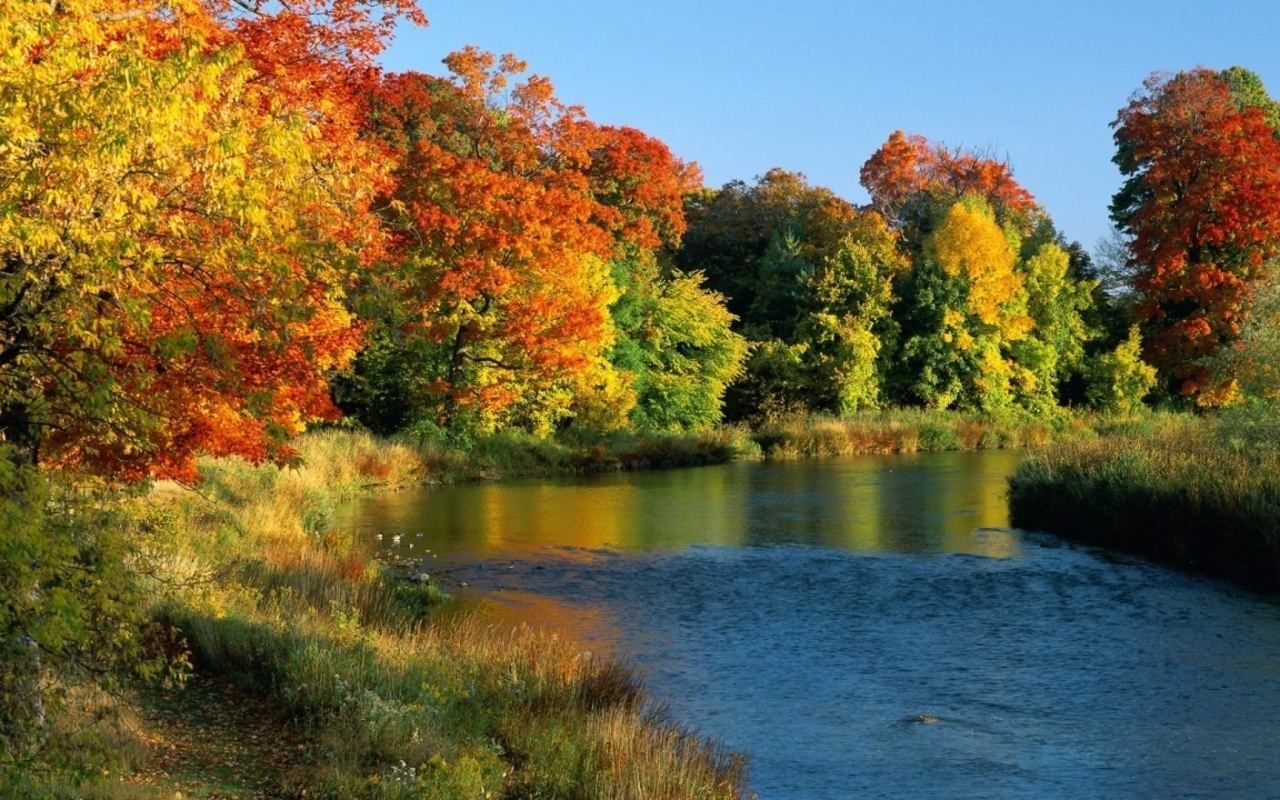

'pics1\\moon.jpg'

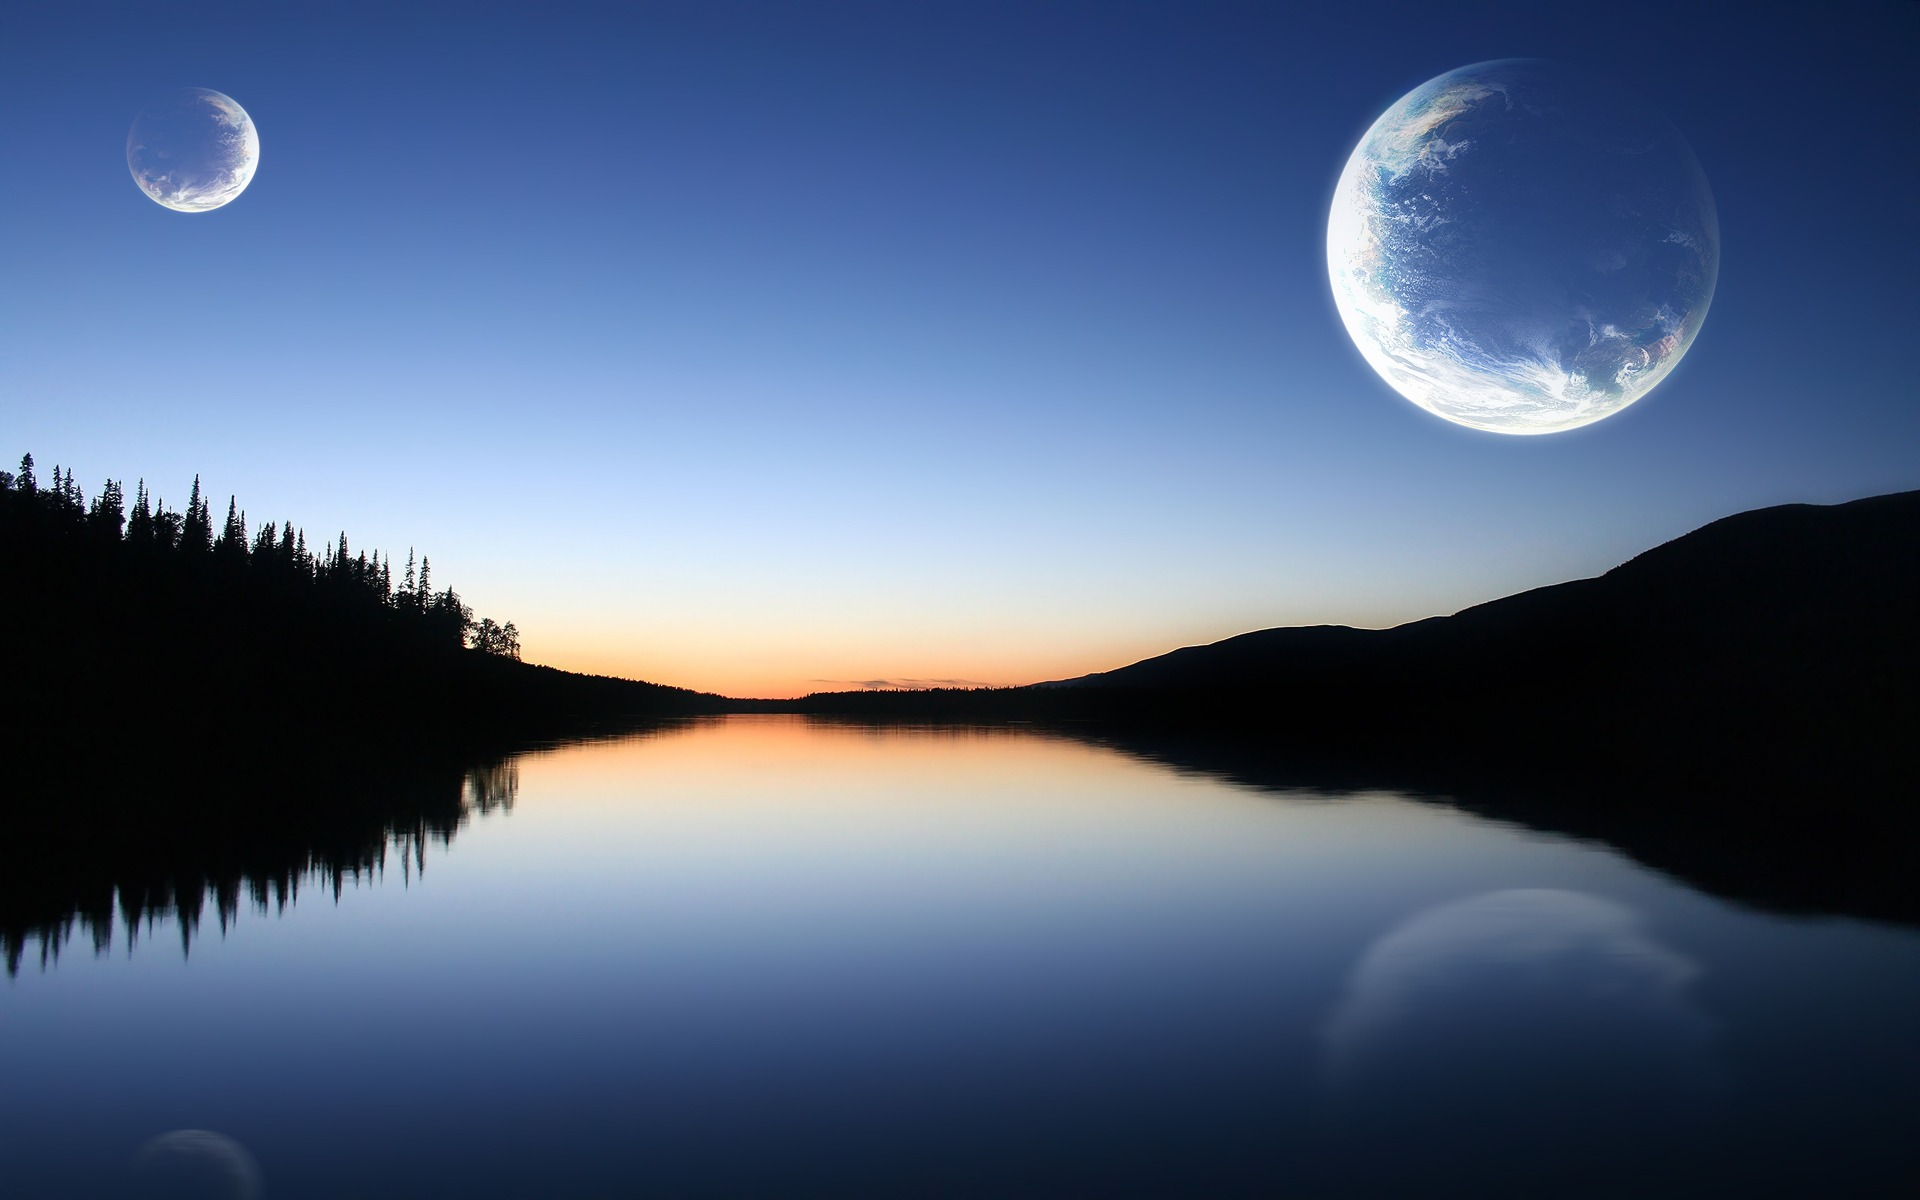

'pics1\\tree.jpg'

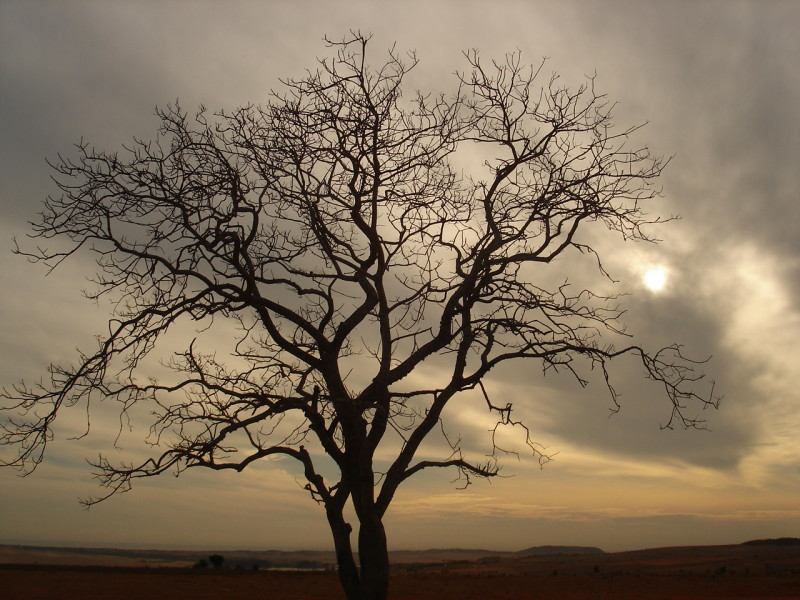

In [19]:
# Run this test cell for get_imgs()
# it should show you all images and cope properly with the "bad image"

images_dict = get_imgs("pics1")

print(images_dict) # dict of Images

# loop over all file names
for name in images_dict:
    image = images_dict[name] # get image with that file names
    display(name, image) # show both


###  Q2: Print out how many pixels each image contains [ 1 pt ]
- loop over images_dict
- get each images width and height
- print out the name and the __total number__ of pixels it contains

In [34]:
for i in images_dict:
    width, height = Image.open(i).size
    print(i[0], "has total number of pixels of:", width * height)

p has total number of pixels of: 1024000
p has total number of pixels of: 2304000
p has total number of pixels of: 480000


### Q3: Write a function that converts each image to a thumbnail [ 3 pts]
- the function will get a dictionary of images and a bounding box as a list of width and height
- loop over all images and convert them to a thumbnail (using thumbnail()) that fits into the given bounding box
- Draw a text with the image's filename into thumbnail at (5,5) from the thumbnails upper left corner
- Use a white text color
- the default font and size should be large enough but you can use the Consolab.tty font and set it to a better size
- To be clear: for each key (filename) you should __replace__ your (large) image (i.e. the initial value for that key) with the newly created thumbnail image. There's no need to keep the large image around.
- return the dictionary

In [72]:
def convert_to_thumbnails(images_dict, bounding_box=[100, 100]):
    myfont = ImageFont.truetype("Consolab.ttf")
    for i in images_dict:
        img = Image.open(i)
        tn_img = img.copy()
        tn_img.thumbnail((bounding_box))
        draw_overlay = ImageDraw.Draw(tn_img)

        draw_overlay.text((5,5),
                          i,
                          fill="white",
                          font=myfont
                          )
        
        images_dict[i] = tn_img        
    return images_dict

{'pics1\\fall.jpg': <PIL.Image.Image image mode=RGB size=200x125 at 0x1BAAE41C8E0>, 'pics1\\moon.jpg': <PIL.Image.Image image mode=RGB size=200x125 at 0x1BAAE093F40>, 'pics1\\tree.jpg': <PIL.Image.Image image mode=RGB size=200x150 at 0x1BAAE445F60>}


'pics1\\fall.jpg'

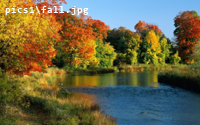

'pics1\\moon.jpg'

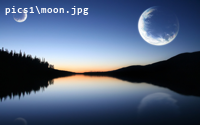

'pics1\\tree.jpg'

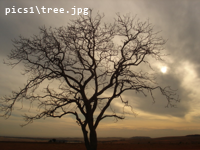

In [73]:
# test for convert_to_thumbnails(), requesting 200 x 200 pixel thumbnails of your images
thumbnail_dict = convert_to_thumbnails(images_dict, [200,200])
print(thumbnail_dict)

for name in thumbnail_dict:
    tn_img = thumbnail_dict[name] # get tn image with that file names
    display(name, tn_img) # show both

### Q4: write a function to figure out the required size of your canvas image [5 pts] 
- we need to know the size (width and height) of the canvas image so that your thumbnails will fit on it when pasted into the canvas.
- As this (once again) should work for any kind of number of images in any other folder, this cannot be hardcoded for your pics1 folder but needs to be solved universally with a function.

- the function will get:
    - a number of thumbnails
    - the bounding box of the thumbnails
    - the desired number of thumbnails __per row__ (i.e. the number of columns)

- from the number of thumbnails and the thumbnails per row given this you need to figure out how many rows of thumbnails you need.
- in the example given at the start I had 3 images and wanted 3 per row. The folder pics1 contains 3 images, so I have only one row

<p>

Examples:
- if I instead have 6 thumbnails and I still want 3 per row, I need 2 rows
- for 4 or 5 thumbnails with 3 per row, I need  also need 2 rows (__It's OK to have empty spots on your canvas!__)
- for 6 thumbnails with 2 per row, I need  3 rows
- for 6 thumbnails with 4 per row, I need 2 rows
- hint: `math.ceil(fl)`, when given a floating point number, will return the __next higher integer number:__
    - `math.ceil(1.2)` => 2     
    - `math.ceil(1.0)` => 1 
    - `math.ceil(2.0)` => 2

<p>
    
- Once you have the number of rows, figure out the size of the canvas:
- in the example, the bounding box for making my thumbnails was 200 x 200 pixels
- for 3 thumbnails in 1 row, the canvas needs to be 600 x 200 
- for 6 thumbnails with 4 per row I get 2 rows and the canvas would need to be 800 x 400 pixels
- put the canvas size in a list with width and height, e.g. `[600, 200]` or `[800, 400]`

- return a list with the canvas size (as a list) and the number of rows: e.g.  `[[600, 200], 1]`  or `[[800, 400], 2]`

In [36]:
def calc_canvas_size(num_thumbnails, bounding_box=[50, 50], num_thumbnails_per_row=3):
    num_rows = math.ceil(num_thumbnails / num_thumbnails_per_row)
    canvas_size = [bounding_box[0] * num_thumbnails_per_row, bounding_box[1] * num_rows]
    li = [canvas_size, num_rows]
    return li

In [25]:
# tests for calc_canvas_size()
bb = [200, 200] # size of bounding box

# must give the results printed to the right :
print(3, 3, calc_canvas_size(3, bb, num_thumbnails_per_row=3), [[600, 200], 1])  # [[600, 200], 1]
print(3, 2, calc_canvas_size(3, bb, num_thumbnails_per_row=2), [[400, 400], 2])  # [[400, 400], 2]
print(4, 3, calc_canvas_size(4, bb, num_thumbnails_per_row=3), [[600, 400], 2])  # [[600, 400], 2]
print(5, 3, calc_canvas_size(5, bb, num_thumbnails_per_row=3), [[600, 400], 2])  # [[600, 400], 2]
print(7, 3, calc_canvas_size(7, bb, num_thumbnails_per_row=3), [[600, 600], 3])  # [[600, 600], 3]
print(6, 4, calc_canvas_size(6, bb, num_thumbnails_per_row=4), [[800, 400], 2])  # [[800, 400], 2]

3 3 [[600, 200], 1] [[600, 200], 1]
3 2 [[400, 400], 2] [[400, 400], 2]
4 3 [[600, 400], 2] [[600, 400], 2]
5 3 [[600, 400], 2] [[600, 400], 2]
7 3 [[600, 600], 3] [[600, 600], 3]
6 4 [[800, 400], 2] [[800, 400], 2]


### Q5: Create a contact sheet from the thumbnails  [8 pts]

- You need to complete the function `make_contact` that "processes" all images inside a given folder and returns a single new image (the thumbnail sheet).

```
make_contact_sheet(folder, # folder containing images
                   thumbnail_size=(200,200), # width and height of the bounding box of the thumbnails
                   thumbnails_per_row=3)# how many thumbnails in each row?
```

- make sure to use `get_imgs()`, `convert_to_thumbnails()` and `calc_canvas_size()`
- make a canvas image (RGB mode, gray-ish color) of the correct size 
- it's OK to initiall `display()` the canvas image inside the function for debugging

- the order of the thumbnails is irrelevant

- there are several ways to fill up the canvas and you're free to use your own method, but here's a suggestion:
    - example: you have 5 thumbnails, with 3 per row
    - loop over all thumbnails as you've done before
    - start your coordinates with x=0, y=0 (upper left corner)
    - col represents which column you currently are in. col starts a 1 (not 0!)
    - paste your thumbnail at x/y 
    - print out x, y and col for debugging
    - move to the next column (add 1 to col)

    - if col == thumbnails_per_row you've pasted in the rightmost column and need to
        - set col back to 1 and set x back to 0, as you need to move back to the leftmost column
        - add the height to y to paste the next thumbnail in to the next (lower) row
    - else: 
        - add width to x and 1 to col (move right to the next column) 
        
    - paste you next thumbnail at x/y, until you're gone through all thumbnails in the dict
    - its OK if you run out of thumbnails before the last row if fully filled, just leave an empty space
    
    - here's what x,y and col would contain for my 5 images
     ```
     0,0   1    200,0   2      400,0   3
     0,200 1    200,200 2      empty
     ```


- return the canvas image

In [88]:
def make_contact_sheet(folder, # folder containing images
             thumbnail_size=(200,200), # width and height of the bounding box of the thumbnails
             thumbnails_per_row=3):# how many thumbnails in each row?
    
    image_dictionary = get_imgs(folder)
    thumbnail_dictionary = convert_to_thumbnails(image_dictionary, thumbnail_size)
    canvas_size = calc_canvas_size(len(image_dictionary), thumbnail_size, thumbnails_per_row)
    canvas = Image.new("RGB", canvas_size[0], color=(200, 200, 200))

    # coordinates of thumbnails upper left corner in image coordinates (0,0 is the upper left corner of the canvas)
    x = 0
    y = 0
    
    col = 1 # starting column
    for i in thumbnail_dictionary:
        thumbnail = thumbnail_dictionary[i]
        canvas.paste(thumbnail, (x, y))
        print(x, y, " ", col)
        if(col == thumbnails_per_row):
            col = 1
            y += thumbnail_size[1]
            x = 0
        else:
            x += thumbnail_size[0]
            col += 1
        

    return canvas
    
    

### Tests for make_contact_sheet()

- you can add more tests using different thumbnail sizes and thumbnails per row but you must pass at least the following 2 cases.
- save results as pics1_sheet.jpg and pics1_sheet.jpg  


Error: pics1\bad_image.jpg will be ignored -  cannot identify image file 'pics1\\bad_image.jpg'
0 0   1
200 0   2
400 0   3


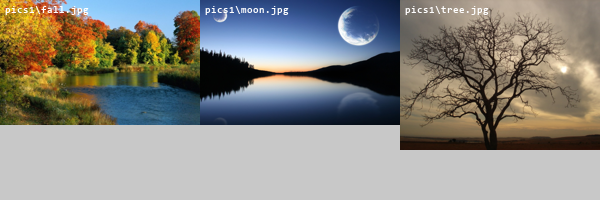

In [89]:
# Test 1
# pics1 images as 200 x 200, 3 images per row

cs = make_contact_sheet("pics1", (200,200), 3)
display(cs)

cs.save("test1_pics1_sheet.jpg")

pics1 images as 200 x 200, 3 images per row




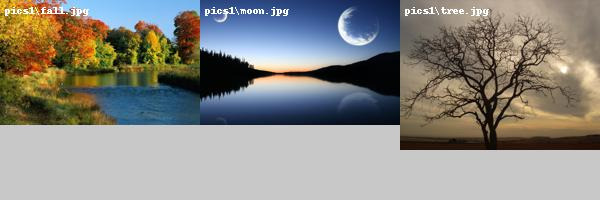

Error: pics2\bad_image.jpg will be ignored -  cannot identify image file 'pics2\\bad_image.jpg'
0 0   1
150 0   2
300 0   3
450 0   4
0 100   1
150 100   2
300 100   3
450 100   4
0 200   1
150 200   2
300 200   3


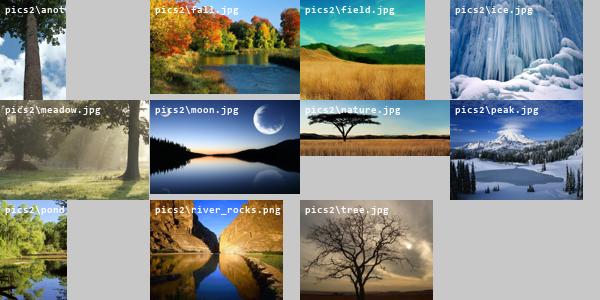

In [90]:
# Test 2
# pics2 images as 150 x 100, 4 images per row
cs = make_contact_sheet("pics2", (150, 100), 4)
display(cs)

cs.save("test2_pics2_sheet.jpg")

pics2 images as 150 x 100, 4 images per row


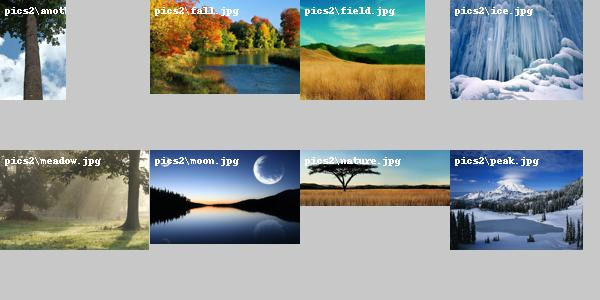




In [ ]:
#  Other tests you might want to run



### Q6: Optional improvements  (up to 3 pts)

I can think of the following improvements. If you want to try implementing some or all of them, we'll give you up to 3 extra points. 

Or: add some other things that I didn't think of! Whatever you do, please display() the result and also save it to disk with a descriptive file name so we can see what you did!


- add more info about each image as text written into each thumbnail, for example:
    - width x height
    - file size in Mb (1 or no decimals: 2.3 Mb or 2 Mb, NOT 2.34535353535 Mb!)
    - for multiple lines of text, you will need to know roughly how tall a line of text is
    - the default font seems to be about 15 pixels tall
    - if you use your own font use `myfont.getsize("X")` to see how tall a big X is
        
- Draw grid boundaries (white lines) into the sheet to improve the visual separation between the images

- Leave a few pixels of space between the thumbnails

- Center the thumbnails

- Wrap the input in a GUI. Have the user select the folder and have them enter the thumbnail size and number of them per row either via a text entry field of via pull down lists. Get a file name to save the sheet, save it and use `show()` on it to show it in a OS image viewer 

